<a href="https://colab.research.google.com/github/mal258/machinelearning258/blob/master/alternus_vera/Invincibles_Alternus_Vera_Iteration1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternus Vera 

Course code : **CMPE-257** 
    
Group name : **Invincibles**
    
Name: 

**Shailesha Prasad Maganahalli**<br>
**Atul Shah**<br>
**Srilalitha Veerubhotla**<br>
**Shreyus Puthiyapurail**<br>


-----

GitHub URL:

Notebook: https://github.com/mal258/machinelearning258/tree/master/alternus_vera

Dataset:


 1. Liar-Liar dataset <br>
 (https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK)
 2. Fake News dataset <br>(https://www.kaggle.com/manasvik/spam-check/data)
 3. UCI-News Aggregator<br>
(http://archive.ics.uci.edu/ml/datasets/News+Aggregator)

4. Google News corpus word2vec <br>
(https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz)

### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).


    

### Process of our Approach 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature 1 :** Source Reputation
- **Feature 2 :** Location- Geography
- **Feature 3 :** Social Credibility 
- **Feature 4 :** BERT model

- Ranking and Importance
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection


### Team Contributions:

|Features  |  Member |
|-----|-----|
| Source Reputation                         |  Shailesha Prasad Maganahalli |  
| Location- Geography                |  Atul Shah | 
| Social Credibility                   | Shreyus Puthiyapurail   |   
| BERT model                             | Srilalitha Veerubhotla |

 
#### Enrichment Dataset Details

- SenticNet5 sensational words corpus
- Google News 3million words corpus for spell check
- Sensational Words Dictionary 
- PoliticalFact Fake news and Real News Content 
- Clickbait and non_clickbait datasets
- Spam Dictionary 

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 


#### What did we try and what worked? 

> We imported the following 3 datasets:
> 1. Liar-Liar dataset <br>
 (https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK)
> 2. Fake News dataset <br>(https://www.kaggle.com/manasvik/spam-check/data)
> 3. UCI-News Aggregator<br>
(http://archive.ics.uci.edu/ml/datasets/News+Aggregator)

>For preprocessing and spellcheck, we used:

>Google News corpus word2vec <br>
(https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz)

>We narrowed down to following features:

- **Feature 1 :** Source Reputation
- **Feature 2 :** Location- Geography
- **Feature 3 :** Social Credibility 
- **Feature 4 :** BERT model

>Basic NLTK preprocessing and Visualizations are completed.

#### What did not work?

> Google word2vec spellchecker timeout: (3 billion running words) to word vector model (3 million 300-dimension English word vectors).



#### What alternatives did you try?

> We tried to upgrade to GPU, and restart the kernel.
> We also explored alternate corpus to do pre-processing.

#### Pending items

> Preprocessing with word2vec corpus 
> Feature modeling <br>
> Combined model in Iteration 2


### Reading the Data

In [1]:
import pandas as pd
import numpy as np
import csv
import gensim
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
import matplotlib.pyplot as plt
import requests
import re
import nltk
import time
import matplotlib.pyplot as plt
import seaborn as sns
import io





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS
from scipy import stats
%matplotlib inline

In [3]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
test_url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/test.tsv"
train_url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/train.tsv"
valid_url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/valid.tsv"



colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news_df = pd.read_csv(train_url, sep='\t', names = colnames, error_bad_lines=False)
test_news_df = pd.read_csv(test_url, sep='\t', names = colnames, error_bad_lines=False)
valid_news_df = pd.read_csv(valid_url, sep='\t', names = colnames, error_bad_lines=False)

In [5]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news_df.shape, 'test dim:', test_news_df.shape)
train_news_df.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*

 1. Remove non-letters/Special Characters and Punctuations
 2. Convert to lower case.
 3. Tokenize.
 4. Convert the stopwords list to "set" data type.
 5. Remove stop words. 
 6. Lemmentize 
 7. Stemming
 8. Join the stemmed words back into one string separated by space, and return the result.

In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def preprocess(raw_news):
    news = re.sub("[^a-zA-Z]", " ", raw_news)   
    news =  news.lower()   
    news_words = nltk.word_tokenize( news)
    stops = set(nltk.corpus.stopwords.words("english"))
    words = [w for w in  news_words  if not w in stops]
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    return " ".join(stems)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
train_news_df['clean'] = train_news_df["headline_text"].apply(preprocess) 
test_news_df['clean'] = test_news_df["headline_text"].apply(preprocess)
valid_news_df['clean'] = valid_news_df["headline_text"].apply(preprocess)




In [8]:
train_news_df.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [9]:
test_news_df.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimin scheme vio...


In [10]:
valid_news_df.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bibl instead kuran ...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parad social welfar organ involv pol...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...


### Spell Check Google News



In [11]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

from gensim import models

model = gensim.models.KeyedVectors.load_word2vec_format('/root/input/GoogleNews-vectors-negative300.bin.gz', binary=True)



words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

--2020-04-22 00:20:40--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.13.30
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.13.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  41.6MB/s    in 37s     

2020-04-22 00:21:17 (42.8 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Visualization 



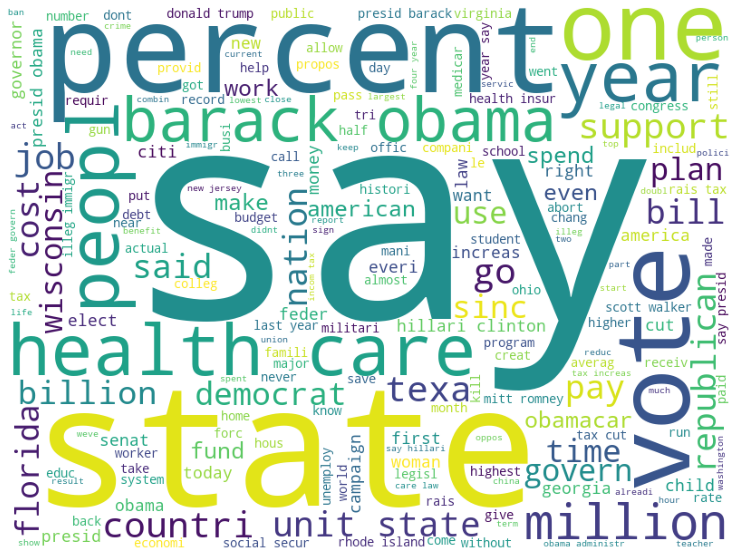

In [12]:
def word_cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
word_cloud(' '.join(train_news_df['clean']))

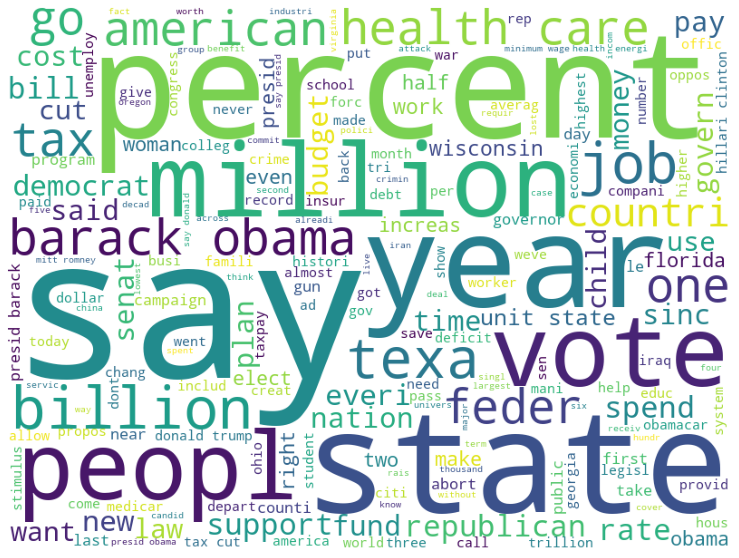

In [13]:
word_cloud(' '.join(test_news_df['clean']))

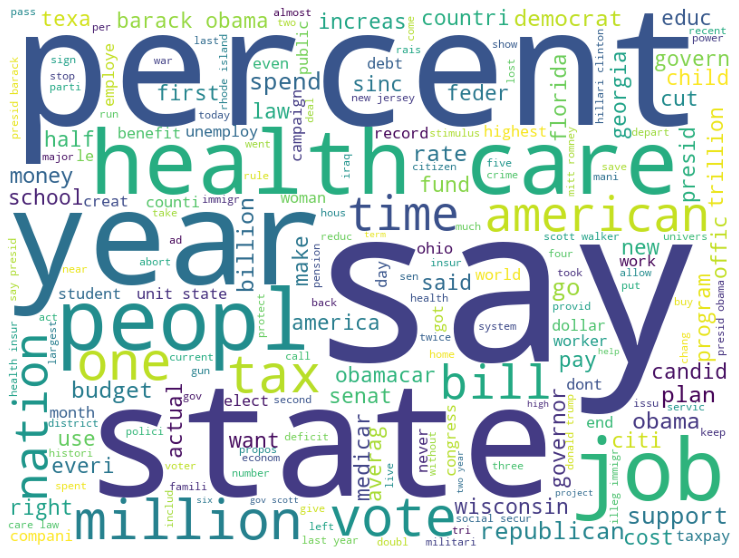

In [14]:
word_cloud(' '.join(valid_news_df['clean']))

##Data Enrichment by adding News Source Dataset 

In [0]:

url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/news_source/news_source.xlsx"


news_source=pd.read_excel(url)



**Features** <br>

Source: http://archive.ics.uci.edu/ml/datasets/News+Aggregator <br>
ID Numeric ID <br>
TITLE News title <br>
URL Url <br>
PUBLISHER Publisher name <br>
CATEGORY News category (b = business, t = science and technology, e = entertainment, m = health) <br>
STORY Alphanumeric ID of the cluster that includes news about the same story <br>
HOSTNAME Url hostname <br>
TIMESTAMP Approximate time the news was published, as the number of milliseconds since the epoch 00:00:00 GMT, January 1, 1970



In [16]:
news_source.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


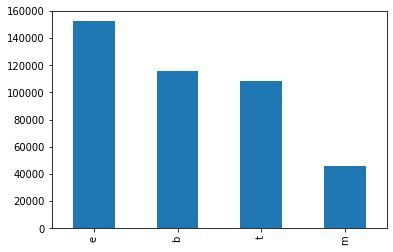

In [17]:

# print the topics being addressed here
news_source['CATEGORY'].value_counts().plot(kind="bar")
plt.show()


##Data Enrichment by adding Fake News Dataset

In [0]:

url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/politifact/fake.csv"
file=requests.get(url).content
fake_news=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')


In [19]:
fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


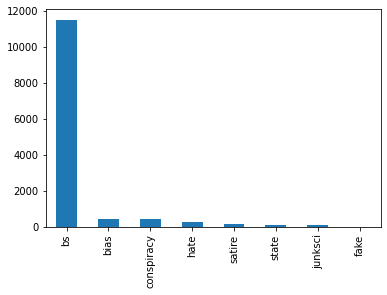

In [20]:

# print the topics being addressed here
fake_news['type'].value_counts().plot(kind="bar")
plt.show()


In [21]:
print(fake_news.describe())
fake_news.head()

       ord_in_thread   domain_rank  ...      comments        shares
count   12999.000000   8776.000000  ...  12999.000000  12999.000000
mean        0.891530  38092.996582  ...      0.038311     10.831833
std         6.486822  26825.487454  ...      0.827335     79.798949
min         0.000000    486.000000  ...      0.000000      0.000000
25%         0.000000  17423.000000  ...      0.000000      0.000000
50%         0.000000  34478.000000  ...      0.000000      0.000000
75%         0.000000  60570.000000  ...      0.000000      0.000000
max       100.000000  98679.000000  ...     65.000000    988.000000

[8 rows x 8 columns]


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [22]:

column_names = list(fake_news.columns)
print(column_names)
for column in column_names:
    if fake_news[column].count()<len(fake_news):
        print(column,fake_news[column].count())     
        
fake_news.loc[fake_news['text'].isnull(),'text'] = ''
fake_news.loc[fake_news['country'].isnull(),'country'] = 'US' 
fake_news.loc[fake_news['author'].isnull(),'author'] = fake_news.loc[fake_news['author'].isnull(),'country']
fake_news.loc[fake_news['thread_title'].isnull(),'thread_title'] = ''
fake_news.loc[fake_news['domain_rank'].isnull(),'domain_rank'] = np.nanmedian(np.array(fake_news['domain_rank']))

 

['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text', 'language', 'crawled', 'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score', 'main_img_url', 'replies_count', 'participants_count', 'likes', 'comments', 'shares', 'type']
author 10575
title 12319
text 12953
country 12823
domain_rank 8776
thread_title 12987
main_img_url 9356


In [0]:
pstem = PorterStemmer()
stop = set(stopwords.words('english'))

def stemmer(text):
    wordlist = text.strip().split()
    pstem = PorterStemmer()
    j = '';
    for word in wordlist:
        try:
            j = j+pstem.stem(word)+' '
        except: 
            print(text)
    return j

fake_news['text_lower'] = fake_news['text'].map(lambda x: re.sub(r'[^a-z ]','',x.lower()))
fake_news['text_lower'] = fake_news['text_lower'].map(lambda x: ' '.join([word for word in x.strip().split() if word not in stop ]))
fake_news['text_lower'] = fake_news['text_lower'].map(lambda x: stemmer(x))
fake_news['thread_lower'] = fake_news['thread_title'].map(lambda x: re.sub(r'[^a-z ]','',x.lower()))
fake_news['thread_lower'] = fake_news['thread_lower'].map(lambda x: ' '.join([word for word in x.strip().split() if word not in stop ]))
fake_news['thread_lower'] = fake_news['thread_lower'].map(lambda x: ' '.join([pstem.stem(word) for word in x.strip().split()]))
fake_news['num_words'] = fake_news['text_lower'].map(lambda x: len(str(x).strip().split()))

In [24]:
def similarity(t1,t2):
    t = [t1,t2]
    tfidf_vectorizer = TfidfVectorizer()
    try:
        vectors = tfidf_vectorizer.fit_transform(t)
        vectors = vectors.toarray()
        sim = cosine_similarity(vectors[0].reshape(1,-1),vectors[1].reshape(1,-1))[0]
    except:
        sim = 0
    return sim

fake_news['similarity'] = [similarity(b['text_lower'],b['thread_lower']) for (a,b) in fake_news.iterrows()]
fake_news['similarity'].describe() 

count    12999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: similarity, dtype: float64

In [25]:
countries = list(fake_news['country'].unique())
fake_news['country_number'] = fake_news['country'].map(lambda x: countries.index(x))
fake_news['country_number'].describe()

count    12999.000000
mean         1.530348
std          4.034031
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         23.000000
Name: country_number, dtype: float64

In [26]:
languages = list(fake_news['language'].unique())
fake_news['language_number'] = fake_news['language'].map(lambda x: languages.index(x))
fake_news['language_number'].describe()

count    12999.000000
mean         0.206170
std          1.056325
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: language_number, dtype: float64

###Features to be considered

1. Number of words <br>
2. Similarity Scores <br>
3. Country<br>
4. Likes<br>
5. Share<br>
6. Comments<br>
7. Retweets<br>
8. Language_number<br>

In [0]:
feature_list = ['num_words','similarity','country_number','likes','shares','comments','replies_count','participants_count','domain_rank','language_number']
target1 = 'spam_score'
target2 = 'type'

In [28]:
real_url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/fake_news/true/True.csv"
fake_url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/fake_news/fake/Fake.csv"

file=requests.get(fake_url).content
fake=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')


file=requests.get(real_url).content
true=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')


true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [29]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [0]:
true['status'] = 0
fake['status'] = 1

In [31]:

df = pd.concat([true, fake])
df = df.sample(frac = 0.5)

df

,title,text,subject,date,status
639,Leaked Secret Government Report Shows Massive...,According to a new report from a combined 13 f...,News,"August 7, 2017",1
6645,"Under threat in Washington, first lady's food ...",NEW YORK (Reuters) - Michelle Obama will be ce...,politicsNews,"December 18, 2016",0
11772,CLUELESS REP MAXINE WATERS Joins Protesters: T...,Democratic Rep. Maxine Waters (Calif.) joined ...,politics,"Jan 30, 2017",1
9638,AUDIT REVEALS: 150 AFGHAN TROOPS Have Gone AWO...,The new report on the number of missing Afghan...,politics,"Oct 20, 2017",1
11942,LOL! This One Picture Sums Up Trump’s BRUTAL S...,Rush Limbaugh nailed it today when he said: T...,politics,"Jan 11, 2017",1
...,...,...,...,...,...
16089,Trump names suspect captured for role in 2012 ...,WASHINGTON (Reuters) - President Donald Trump ...,worldnews,"October 30, 2017",0
5146,Trump says wants defense buildup to project U....,"NEWPORT NEWS, Va. (Reuters) - President Donald...",politicsNews,"March 2, 2017",0
16894,France's Macron says Raqqa fall not end of bat...,PARIS (Reuters) - President Emmanuel Macron sa...,worldnews,"October 20, 2017",0
14077,TRUMP WINS NEW YORK IN A LANDSLIDE: Will Third...,Is a third place finish for Cruz a game change...,politics,"Apr 19, 2016",1


In [0]:
df.title = df.title.str.lower()
df.text = df.text.str.lower()
df = df.drop(columns = ['subject','date'])


In [33]:
df.text = df.title + ' ' + df.text
df = df.drop(columns = ['title'])
df.head()

,text,status
639,leaked secret government report shows massive...,1
6645,"under threat in washington, first lady's food ...",0
11772,clueless rep maxine waters joins protesters: t...,1
9638,audit reveals: 150 afghan troops have gone awo...,1
11942,lol! this one picture sums up trump’s brutal s...,1


In [34]:
train, test = train_test_split(df, test_size = 0.3, random_state = 7)

train

,text,status
11314,nancy pelosi tries to lead democrats in chants...,1
5425,rnc chaos continues as top fundraiser resigns...,1
3011,trump high court pick gorsuch shows conservati...,0
5521,this texas pro-cop facebook page shared this ...,1
3799,according to the new white house chief strate...,1
...,...,...
18458,four killed as militants attack airport securi...,0
7019,senate to vote on iran sanctions renewal this ...,0
1248,trump royally blindsided his own national sec...,1
20411,"5-star mooch, her taxpayer funded mom and mery...",1


In [35]:
test

,text,status
2776,trump blames computer failure for worldwide c...,1
12966,why is there uproar over trump's jerusalem dec...,0
15962,russia won't hand over suspect in montenegro c...,0
10930,house committee to hold puerto rico hearing fe...,0
14786,north korea's kim trades missiles for tractors...,0
...,...,...
9014,bernie sanders shows how to properly handle h...,1
15800,why these army rotc cadets were pressured into...,1
1294,lawmakers want answers about jared kushner’s ...,1
12025,china air force drills in sea of japan and aga...,0


In [36]:
cv = CountVectorizer(stop_words = 'english')
fitting = list(train.text)
cv.fit(fitting)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
features = cv.transform(fitting).toarray()

In [0]:
inv_vocab = {v: k for k, v in cv.vocabulary_.items()}
vocabulary = [inv_vocab[i] for i in range(len(inv_vocab))]

In [0]:
new_train = pd.DataFrame(features, columns = vocabulary)

In [40]:
new_train

,00,000,0000,00004,0009,000938,000a,000after,000although,000california,000cylvia,000ecuador,000florida,000georgia,000illegal,000illinois,000in,000jose,000kyrgyzstan,000michigan,000new,000oman,000saudi,000south,000th,000the,001,00106,0018,001st,002,0020,00240,002singapore,003,004,00458,0047,004saint,005,...,zuras,zurcher,zurich,zus,zusman,zutczdus0l,zuwara,zuzhou,zvezda,zvi,zvia,zvizdic,zvoncheck,zvxfqk9ig1,zwa,zwak,zweli,zwickau,zwolinski,zwxep0tkfw,zx4rpasahq,zx5ktdlyoj,zx7gkfbuv4,zxmgklb,zxq8ybt0qs,zxsffo7sow,zy3mebisvp,zych,zyifjwyfdh,zyj5fpoudg,zynga,zyomso3skd,zypries,zz,zzjjpdaivn,zzpx_bzka40police,zzqvyk8xif,zztaine,zzuml4hkoc,état
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15712,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
to_remove = list(new_train.sum(axis = 0).sort_values()[:65000].index)


In [0]:
new_train = new_train.drop(columns = to_remove)

In [43]:
new_train

,00,000,01,038,04,10,100,101,106,10th,11,110,1100,112,115,118,11th,12,120,122,125,12th,13,130,135,13th,14,140,145,14th,15,150,155,15th,16,160,165,16th,17,170,...,young,younger,youngest,youth,youths,youtu,youtube,ypg,yr,yuan,yuge,yugoslavia,yun,yves,zach,zaghari,zakharova,zanu,zarif,zarrab,zaw,zealand,zeid,zeitung,zeman,zero,zhang,zika,zimbabwe,zimbabwean,zimmerman,zinke,zip,zippers,zone,zones,zoo,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15712,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svc = LinearSVC()
svc.fit(new_train, train.status)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [46]:
test_features = cv.transform(list(test.text)).toarray()
new_test = pd.DataFrame(test_features, columns = vocabulary)
new_test = new_test.drop(columns = to_remove)
new_test

,00,000,01,038,04,10,100,101,106,10th,11,110,1100,112,115,118,11th,12,120,122,125,12th,13,130,135,13th,14,140,145,14th,15,150,155,15th,16,160,165,16th,17,170,...,young,younger,youngest,youth,youths,youtu,youtube,ypg,yr,yuan,yuge,yugoslavia,yun,yves,zach,zaghari,zakharova,zanu,zarif,zarrab,zaw,zealand,zeid,zeitung,zeman,zero,zhang,zika,zimbabwe,zimbabwean,zimmerman,zinke,zip,zippers,zone,zones,zoo,zor,zuckerberg,zuma
0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6731,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6733,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [0]:
ans = svc.predict(new_test)

In [48]:
accuracy_score(ans, test.status)

0.9934669636228656

###**LDA**


In [49]:
train_news_df['index'] = train_news_df.index
data = train_news_df
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
0,say anni list polit group support third trimes...,0
1,declin coal start start natur gas took start b...,1
2,hillari clinton agre john mccain vote give geo...,2
3,health care reform legisl like mandat free sex...,3


In [50]:
test_news_df['index'] = test_news_df.index
data = test_news_df
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
0,build wall u mexico border take liter year,0
1,wisconsin pace doubl number layoff year,1
2,say john mccain done noth help vet,2
3,suzann bonamici support plan cut choic medicar...,3


In [51]:
valid_news_df['index'] = valid_news_df.index
data = valid_news_df
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

,clean,index
0,le american work,0
1,obama sworn offic use holi bibl instead kuran ...,1
2,say organ parad social welfar organ involv pol...,2
3,say near half oregon child poor,3


In [52]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [say, anni, list, polit, group, support, third...
1    [declin, coal, start, start, natur, gas, took,...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
Name: clean, dtype: object

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = train_news_df['clean'].map(get_word_tokens)

In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

In [0]:

def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

In [61]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(train_news_df,
                                                                      'clean')

######## DICTIONARY Words and occurences ########
0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 third
9 trimest
10 administr

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abort") appears 1 time.
Word 1 ("demand") appears 1 time.
Word 2 ("group") appears 1 time.
Word 3 ("list") appears 1 time.
Word 4 ("polit") appears 1 time.
Word 6 ("support") appears 1 time.
Word 7 ("third") appears 1 time.


In [62]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['state', 'romney', 'support', 'mitt', 'dollar', 'percent', 'peopl', 'health', 'million', 'care']
1::['presid', 'state', 'obama', 'rate', 'percent', 'citi', 'nation', 'clinton', 'rais', 'counti']
2::['state', 'year', 'time', 'everi', 'unit', 'last', 'five', 'three', 'sinc', 'cost']
3::['obama', 'state', 'would', 'barack', 'presid', 'school', 'countri', 'plan', 'bill', 'nation']
4::['percent', 'year', 'american', 'creat', 'peopl', 'last', 'feder', 'care', 'health', 'today']
5::['percent', 'vote', 'spend', 'state', 'year', 'increas', 'billion', 'time', 'fund', 'debt']
6::['obama', 'vote', 'presid', 'barack', 'billion', 'said', 'sinc', 'even', 'rais', 'court']
7::['health', 'care', 'govern', 'vote', 'million', 'insur', 'peopl', 'hous', 'obamacar', 'bill']
8::['peopl', 'plan', 'million', 'secur', 'health', 'social', 'republican', 'would', 'john', 'said']
9::['percent', 'state', 'countri', 'world', 'island', 'offic', 'crime', 'rhode', 'voter', 'rate']


In [63]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.31921867550751726),
 (1, 0.47006877100752914),
 (2, 0.38412798555344074),
 (3, 0.43593190233616774),
 (4, 0.3828926309176976),
 (6, 0.2555959049909224),
 (7, 0.35722236983665817)]


In [64]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['state', 'year', 'texa', 'citi', 'counti', 'sinc', 'percent', 'island', 'increas', 'unit']
1::['obama', 'year', 'state', 'billion', 'million', 'senat', 'world', 'rais', 'presid', 'candid']
2::['percent', 'american', 'vote', 'today', 'rais', 'year', 'republican', 'rate', 'obama', 'child']
3::['percent', 'state', 'creat', 'year', 'american', 'govern', 'feder', 'wisconsin', 'vote', 'worker']
4::['care', 'health', 'clinton', 'hillari', 'obama', 'plan', 'would', 'debt', 'trillion', 'everi']
5::['school', 'state', 'million', 'year', 'percent', 'student', 'spend', 'averag', 'wage', 'presid']
6::['year', 'state', 'percent', 'obama', 'vote', 'barack', 'america', 'countri', 'presid', 'wisconsin']
7::['year', 'percent', 'state', 'rate', 'reagan', 'cost', 'obamacar', 'million', 'class', 'famili']
8::['vote', 'time', 'health', 'state', 'social', 'spend', 'secur', 'medicar', 'insur', 'percent']
9::['obama', 'presid', 'percent', 'state', 'barack', 'vote', 'muslim', 'peopl', 'obamacar', 'budget']


In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

In [66]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
train_news_df = update_lda_results_to_dataset(
    train_news_df, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
train_news_df.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,index,topic_number,lda_score,topic_top_words
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,0,0,0.668135,state romney support mitt dollar percent peopl...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,1,8,0.733821,peopl plan million secur health social republi...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,2,8,0.924986,peopl plan million secur health social republi...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,3,8,0.569484,peopl plan million secur health social republi...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,4,3,0.774959,obama state would barack presid school countri...


In [67]:
test_news_df = update_lda_results_to_dataset(
    test_news_df,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news_df.head()


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,index,topic_number,lda_score,topic_top_words
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,0,0,0.871389,state romney support mitt dollar percent peopl...
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,1,5,0.819965,percent vote spend state year increas billion ...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,2,8,0.849984,peopl plan million secur health social republi...
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,3,6,0.849963,obama vote presid barack billion said sinc eve...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimin scheme vio...,4,6,0.899971,obama vote presid barack billion said sinc eve...


In [68]:
valid_news_df = update_lda_results_to_dataset(
    valid_news_df,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news_df.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,index,topic_number,lda_score,topic_top_words
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,0,4,0.699949,percent year american creat peopl last feder c...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bibl instead kuran ...,1,4,0.456004,percent year american creat peopl last feder c...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parad social welfar organ involv pol...,2,0,0.639279,state romney support mitt dollar percent peopl...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,3,3,0.849951,obama state would barack presid school countri...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,4,3,0.494481,obama state would barack presid school countri...


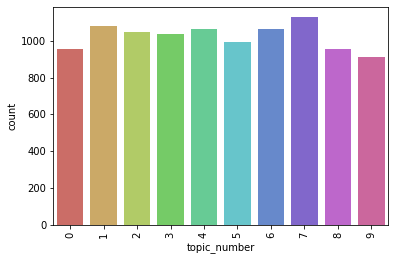

In [69]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(train_news_df) # TRAIN Document Vector


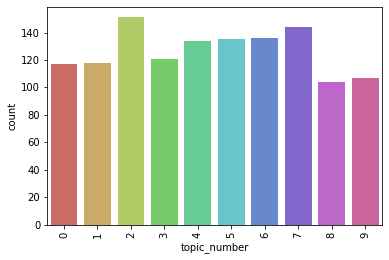

In [70]:
create_distribution(test_news_df)# TEST Document Vector

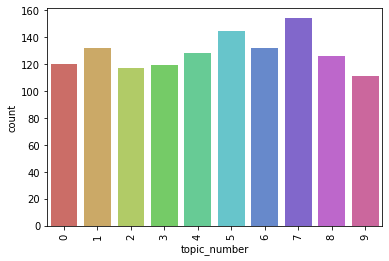

In [71]:
create_distribution(valid_news_df)# VALID Document Vector

##**Feature 1 :** Source Reputation


##**Feature 2 :** Location- Geography


##**Feature 3 :** Social Credibility 


##**Feature 4 :** BERT model

# FINAL COMBINED MODEL

>